# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# set up lists to hold reponse info
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

index_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("------------------------------")
print()

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)




# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, start = 1):
       
    final_url = query_url + city


    try:
        response = requests.get(final_url).json()
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response['dt'])
        
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 

    except(KeyError, IndexError):
        print("City not found. Skipping...")
    


print()
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    

Beginning Data Retrieval
------------------------------

Processing Record 1 of Set 1 | ridgecrest
Processing Record 2 of Set 1 | ostersund
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | dikson
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hilo
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ereymentau
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | arkhipo-osipovka
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | howard springs
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | longhua
Processing Record 21 of Set 1 | simao
Processing Record

Processing Record 37 of Set 4 | port macquarie
Processing Record 38 of Set 4 | port elizabeth
City not found. Skipping...
Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | antofagasta
Processing Record 41 of Set 4 | xuddur
Processing Record 42 of Set 4 | dieppe
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | nioro
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | limbuhan
Processing Record 47 of Set 4 | san juan
Processing Record 48 of Set 4 | vytegra
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | plattsburgh
Processing Record 0 of Set 5 | oriximina
Processing Record 1 of Set 5 | saint-georges
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | naranjal
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | la romana
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | airai
City 

Processing Record 16 of Set 8 | mount isa
Processing Record 17 of Set 8 | lazaro cardenas
Processing Record 18 of Set 8 | fortuna
Processing Record 19 of Set 8 | makinsk
Processing Record 20 of Set 8 | sorong
Processing Record 21 of Set 8 | lagoa
Processing Record 22 of Set 8 | oktyabrskoye
Processing Record 23 of Set 8 | wysokie mazowieckie
Processing Record 24 of Set 8 | hofn
Processing Record 25 of Set 8 | dudinka
Processing Record 26 of Set 8 | cairns
Processing Record 27 of Set 8 | kualakapuas
City not found. Skipping...
Processing Record 28 of Set 8 | mahebourg
Processing Record 29 of Set 8 | krasnyy yar
Processing Record 30 of Set 8 | antsohihy
Processing Record 31 of Set 8 | naantali
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | eisenerz
Processing Record 34 of Set 8 | mocuba
Processing Record 35 of Set 8 | linqiong
Processing Record 36 of Set 8 | saint-joseph
Processing Record 37 of Set 8 | sembe
Processing Record 38 of Set 8 | mayo
Processing Recor

Processing Record 1 of Set 12 | koutsouras
Processing Record 2 of Set 12 | gorontalo
Processing Record 3 of Set 12 | nanga eboko
Processing Record 4 of Set 12 | ambovombe
Processing Record 5 of Set 12 | raga
Processing Record 6 of Set 12 | denpasar
Processing Record 7 of Set 12 | ndele
Processing Record 8 of Set 12 | guamal
Processing Record 9 of Set 12 | ancud
Processing Record 10 of Set 12 | vesoul

------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
city_data = pd.DataFrame({ 
                          "City" : city_list,
                          "Lat" : lat_list,
                          "Lng": lng_list,
                          "Max Temp" : max_temp_list,
                          "Humidity" : humidity_list,
                          "Cloudiness" : cloudiness_list,
                          "Wind Speed" : wind_speed_list,
                          "Country" : country_list,
                          "Date" : date_list
})

city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ridgecrest,35.6225,-117.6709,59.00,38,40,20.71,US,1613118396
1,Östersund,63.1792,14.6357,19.40,86,100,17.27,SE,1613118484
2,Bengkulu,-3.8004,102.2655,85.42,65,19,9.44,ID,1613118485
3,Dikson,73.5069,80.5464,-17.77,89,100,8.48,RU,1613118485
4,Atuona,-9.8000,-139.0333,78.82,77,1,11.03,PF,1613118485
...,...,...,...,...,...,...,...,...,...
566,Denpasar,-8.6500,115.2167,86.00,74,20,10.36,ID,1613118315
567,Ndélé,8.4109,20.6473,85.82,13,0,6.89,CF,1613118566
568,Guamal,9.1433,-74.2238,73.98,75,11,1.50,CO,1613118566
569,Ancud,-41.8697,-73.8203,51.01,87,0,6.91,CL,1613118567


In [41]:
city_data.to_csv("output_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

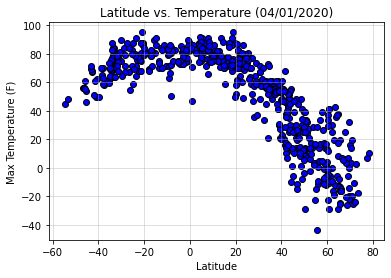

In [42]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "Blue", edgecolor = "Black")


plt.title("Latitude vs. Temperature (04/01/2020)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha = 0.5)

plt.savefig("../Images/Latitude vs Temperature.png")


## Latitude vs. Humidity Plot

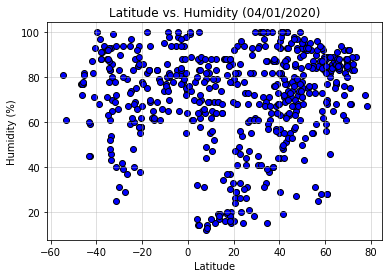

In [43]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor = "Blue", edgecolor = "Black")

plt.title("Latitude vs. Humidity (04/01/2020)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha = 0.5)


plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

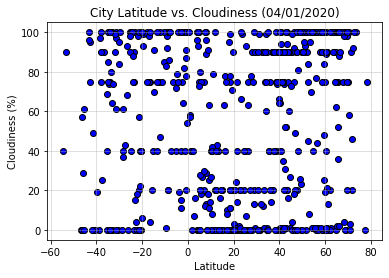

In [44]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "Blue", edgecolor = "Black")

plt.title("City Latitude vs. Cloudiness (04/01/2020)")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(alpha = 0.5)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

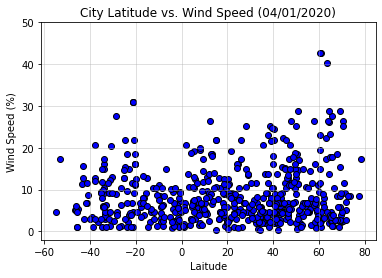

In [45]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "Blue", edgecolor = "Black")
plt.title("City Latitude vs. Wind Speed (04/01/2020)")


plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(alpha = 0.5)

plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [106]:
north_hemisphere = city_data.loc[city_data["Lat"]>= 0]
south_hemisphere = city_data.loc[city_data["Lat"]< 0] 


def linear_regression(x,y):
    #print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
 #   Print (line_eq)
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate (line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

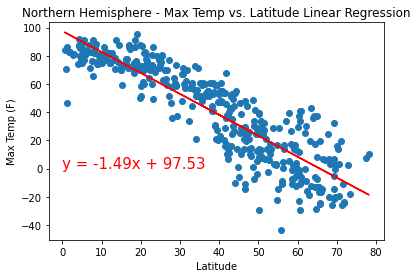

In [108]:
north_line_reg = linear_regression(north_hemisphere["Lat"], north_hemisphere["Max Temp"])

annotate(north_line_reg, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

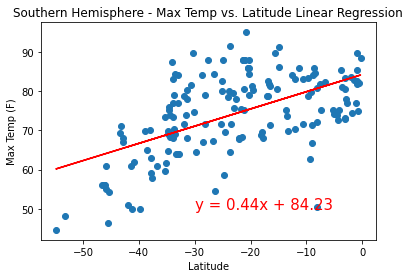

In [109]:
south_line_reg = linear_regression(south_hemisphere["Lat"], south_hemisphere["Max Temp"])

annotate(south_line_reg, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

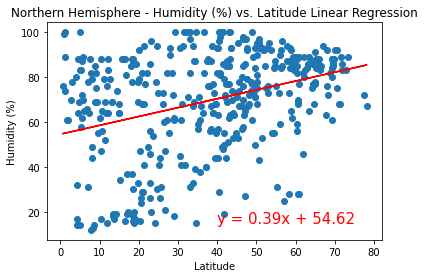

In [110]:
north_line_reg = linear_regression(north_hemisphere["Lat"], north_hemisphere["Humidity"])

annotate(north_line_reg, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

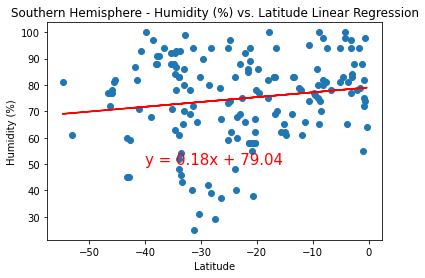

In [111]:
south_line_reg = linear_regression(south_hemisphere["Lat"], south_hemisphere["Humidity"])


annotate(south_line_reg, -40, 50)


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

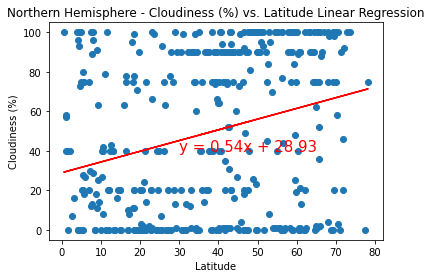

In [112]:
north_line_reg = linear_regression(north_hemisphere["Lat"], north_hemisphere["Cloudiness"])


annotate(north_line_reg, 30, 40)


plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

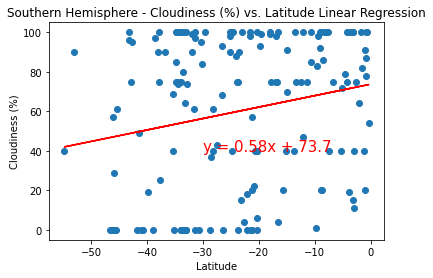

In [113]:
south_line_reg = linear_regression(south_hemisphere["Lat"], south_hemisphere["Cloudiness"])

# Call an function #2
annotate(south_line_reg, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

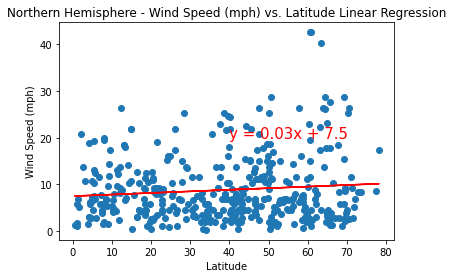

In [114]:
north_line_reg = linear_regression(north_hemisphere["Lat"], north_hemisphere["Wind Speed"])

# Call an function #2
annotate(north_line_reg, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

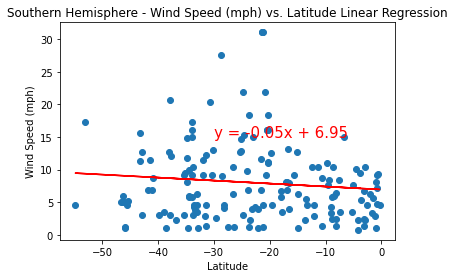

In [115]:
south_line_reg = linear_regression(south_hemisphere["Lat"], south_hemisphere["Wind Speed"])

# Call an function #2
annotate(south_line_reg, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()